In [1]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

#open Dataset f
import os
path = 'Dataset'
files = os.listdir(path)
files.sort()
print(files)    



['1.png', '2.png', '3.png', '4.png']


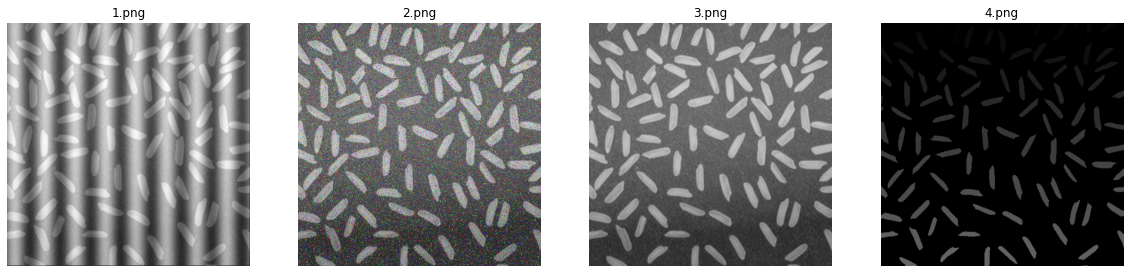

In [2]:
#view image
fig = plt.figure(figsize=(20,20))
for i in range(4):
    img = cv2.imread(os.path.join(path,files[i]))
    fig.add_subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(files[i])
    plt.axis('off')

(-0.5, 460.5, 460.5, -0.5)

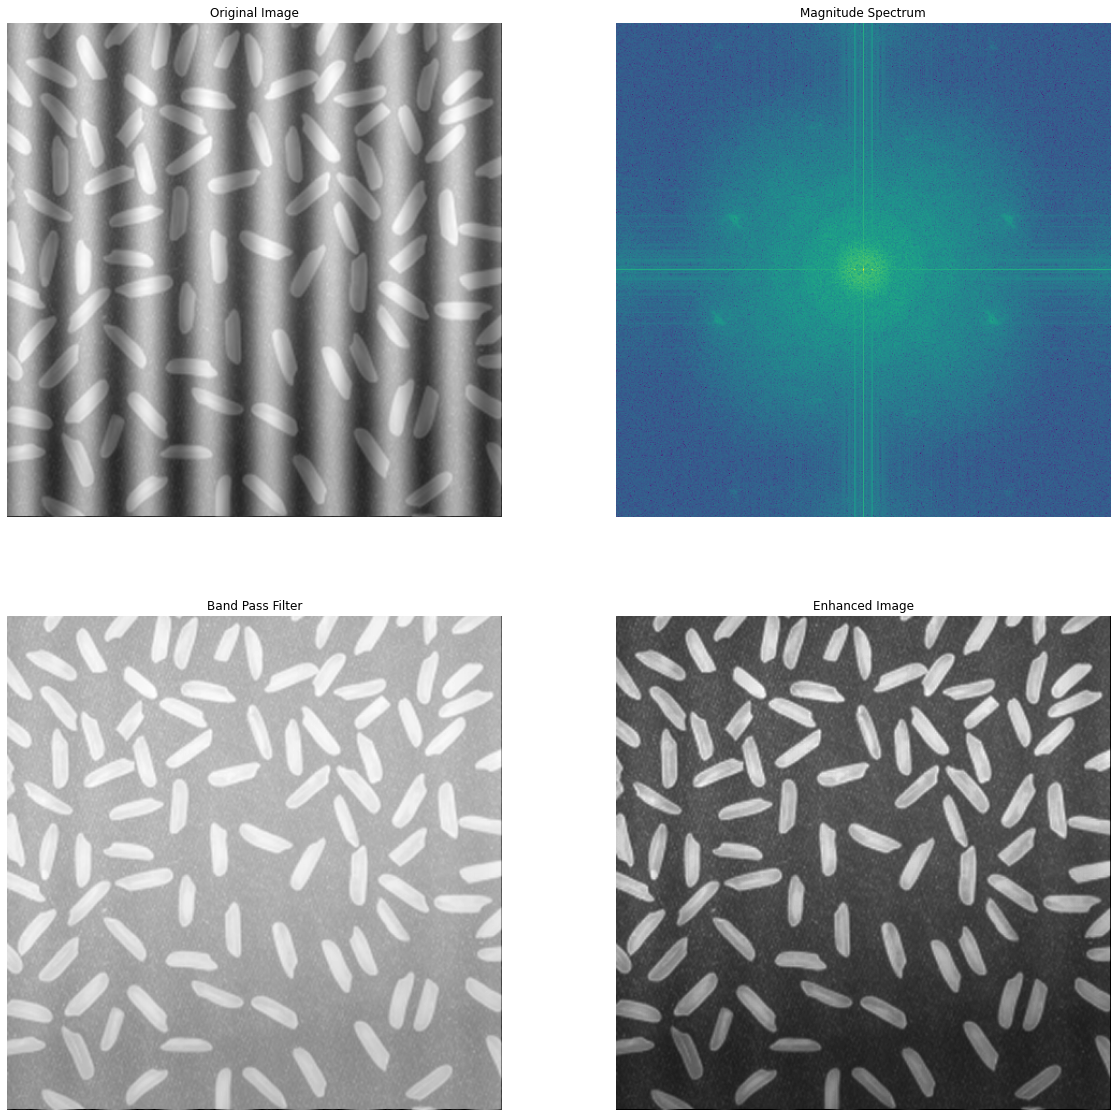

In [14]:
#1.PNG
img = cv2.imread(os.path.join(path,files[0]))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 1+np.log(np.abs(fshift))

#band pass filter
def bandpass_filter(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    #find average value of fshift
    avg = np.mean(fshift)
    max = np.max(fshift)

    for i in range(fshift.shape[0]):
        for j in range(fshift.shape[1]):
            if i>fshift.shape[0]/4 and j>fshift.shape[1]/4 and fshift[i,j]>max/100 and fshift[i,j]<max:
                fshift[i,j] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
img2 = bandpass_filter(img1)
#gamma correction
def gamma_correction(img,gamma):
    img = img/(255)
    img = img**(1/gamma)
    return img

img3 = gamma_correction(img2,0.3)
fig = plt.figure(figsize=(20,20))
fig.add_subplot(2,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
fig.add_subplot(2,2,2)
plt.imshow(magnitude_spectrum)
plt.title('Magnitude Spectrum')
plt.axis('off')
fig.add_subplot(2,2,3)
plt.imshow(img2,cmap= 'gray')
plt.title('Band Pass Filter')
plt.axis('off')
fig.add_subplot(2,2,4)
plt.imshow(img3, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

(-0.5, 460.5, 460.5, -0.5)

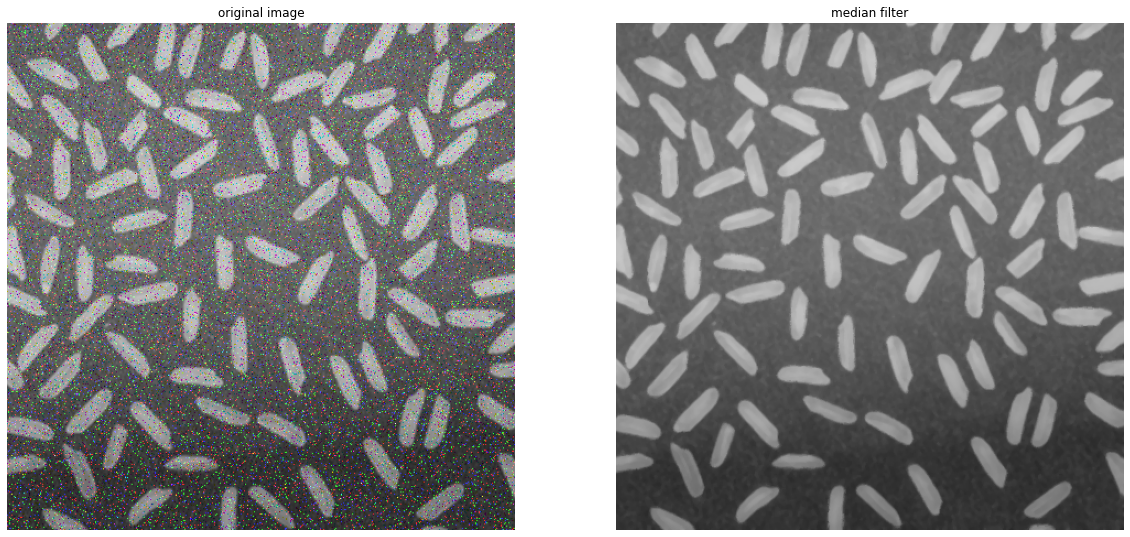

In [4]:
#2.PNG
#median filter
img = cv2.imread(os.path.join(path,files[1]))
def median_blur(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img1[i,j] = np.median(img[i:i+ker,j:j+ker])
    return img1
img1 = median_blur(img,4)
#compare img vs img1
fig= plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('original image')
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.title('median filter')
plt.axis('off')

(-0.5, 460.5, 460.5, -0.5)

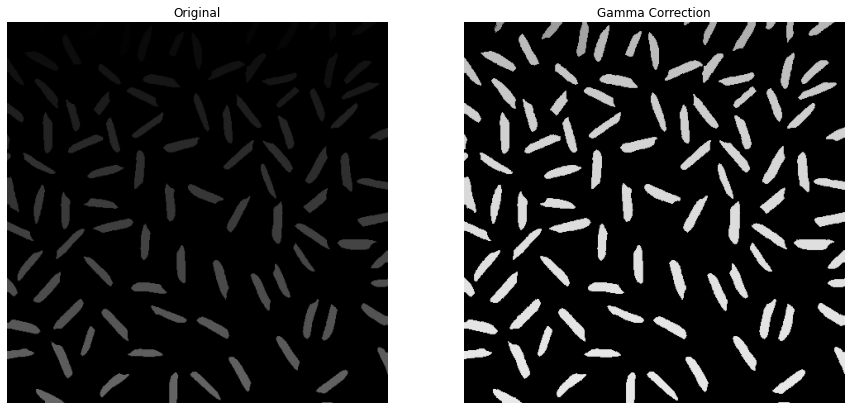

In [5]:
#4.PNG
#gamma correction
def gamma_correction(img,gamma):
    img = img/(255)
    img = img**(1/gamma)
    return img
img = cv2.imread(os.path.join(path,files[3]))
img1= gamma_correction(img,10)
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.title('Gamma Correction')
plt.axis('off')
